In [1]:
# Section 1: Import Libraries and Helpers
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
# Add the project root to the system path
if project_root not in sys.path:
    sys.path.append(project_root)


import joblib
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from helpers.visualization_helpers import plot_confusion_matrix, display_classification_report

In [3]:
# Section 2: Load Preprocessed Data

X_train = joblib.load('../outputs/models/X_train_balanced.joblib')
y_train = joblib.load('../outputs/models/y_train_balanced.joblib')
X_test = joblib.load('../outputs/models/X_test_tfidf.joblib')
y_test = joblib.load('../outputs/models/y_test.joblib')

print("Preprocessed data loaded successfully.")

# Section 3: Prepare Data for Neural Network

# Convert sparse matrices to dense
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# One-hot encode the target labels
y_train_categorical = to_categorical(y_train - 1, num_classes=5)  # Adjust labels to start from 0
y_test_categorical = to_categorical(y_test - 1, num_classes=5)

# Section 4: Model Building

# Define the neural network architecture
model = Sequential()
model.add(Dense(512, input_shape=(X_train_dense.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))  # 5 classes for ratings 1-5

# Compile the model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

print("\nNeural Network model summary:")
model.summary()

# Section 5: Model Training

# Train the model
history = model.fit(X_train_dense, y_train_categorical,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1,
                    verbose=1)

print("\nNeural Network model trained successfully.")

Preprocessed data loaded successfully.

Neural Network model summary:


C:\Users\paige\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │     2,560,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,725,381 (10.40 MB)

 Trainable params: 2,725,381 (10.40 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.4950 - loss: 1.1511 - val_accuracy: 0.5204 - val_loss: 0.7994
Epoch 2/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - accuracy: 0.8399 - loss: 0.4034 - val_accuracy: 0.7642 - val_loss: 0.5265
Epoch 3/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.8951 - loss: 0.2520 - val_accuracy: 0.8849 - val_loss: 0.3299
Epoch 4/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - accuracy: 0.9263 - loss: 0.1829 - val_accuracy: 0.9097 - val_loss: 0.2496
Epoch 5/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.9514 - loss: 0.1339 - val_accuracy: 0.9677 - val_loss: 0.1145
Epoch 6/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.9691 - loss: 0.0925 - val_accuracy: 0.9845 - val_loss: 0.0611
Epoch 7/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.9796 - loss: 0.0650 - val_accuracy: 0.9928 - val_loss: 0.0326
Epoch 8/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9824 - loss: 0.0539 - 

In [5]:
# Save the model in native Keras format
model_save_path = '../outputs/models/neural_network_model.keras'
model.save(model_save_path)
print(f"Neural Network model saved successfully to {model_save_path}.")

Neural Network model saved successfully to ../outputs/models/neural_network_model.keras.



Test Accuracy: 0.5860
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Classification Report:
               precision    recall  f1-score   support

           1       0.63      0.64      0.63       284
           2       0.43      0.44      0.44       359
           3       0.38      0.21      0.27       437
           4       0.47      0.52      0.49      1208
           5       0.72      0.75      0.73      1811

    accuracy                           0.59      4099
   macro avg       0.53      0.51      0.51      4099
weighted avg       0.58      0.59      0.58      4099

Figure saved to ../outputs/figures/neural_network_confusion_matrix.png


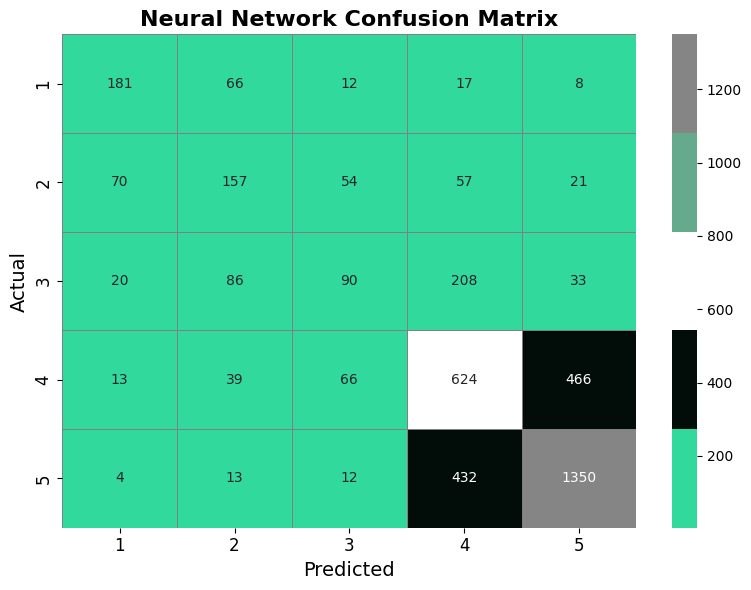


Neural Network model saved successfully.


In [4]:
# Section 6: Model Evaluation

# Evaluate on test data
loss, accuracy = model.evaluate(X_test_dense, y_test_categorical, verbose=0)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Make predictions
y_pred_probs = model.predict(X_test_dense)
y_pred = np.argmax(y_pred_probs, axis=1) + 1  # Adjust labels back to 1-5

# Display Classification Report
display_classification_report(y_test, y_pred)

# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred, 
                             classes=[1, 2, 3, 4, 5], 
                             title="Neural Network Confusion Matrix", 
                             save_path='../outputs/figures/neural_network_confusion_matrix.png')

# Section 7: Save the Trained Model

# Save the entire model
model.save('../outputs/models/neural_network_model.h5')
print("\nNeural Network model saved successfully.")
